In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'cell_images/Train'
valid_path = 'cell_images/Test'

In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


80134624/80134624 [==============================] - 505s 6us/step


In [4]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [17]:
# useful for getting number of output classes
folders = glob('C:/Users/jagad/OneDrive/Desktop/data/Train/*')


In [18]:
folders


['C:/Users/jagad/OneDrive/Desktop/data/Train\\Parasite',
 'C:/Users/jagad/OneDrive/Desktop/data/Train\\Uninfected']

In [19]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [20]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [21]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [22]:
from tensorflow.keras.layers import MaxPooling2D

In [23]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [24]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [25]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [27]:

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:/Users/jagad/OneDrive/Desktop/data/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [28]:
training_set

In [30]:
test_set = test_datagen.flow_from_directory('C:/Users/jagad/OneDrive/Desktop/data/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [32]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
13/13 [==============================] - 22s 2s/step - loss: 1.7107 - accuracy: 0.5409 - val_loss: 0.6851 - val_accuracy: 0.6791
Epoch 2/50
13/13 [==============================] - 19s 1s/step - loss: 0.5872 - accuracy: 0.7067 - val_loss: 0.8136 - val_accuracy: 0.3209
Epoch 3/50
13/13 [==============================] - 13s 954ms/step - loss: 0.4800 - accuracy: 0.7548 - val_loss: 1.0075 - val_accuracy: 0.3060
Epoch 4/50
13/13 [==============================] - 11s 842ms/step - loss: 0.4613 - accuracy: 0.7812 - val_loss: 0.7416 - val_accuracy: 0.4925
Epoch 5/50
13/13 [==============================] - 11s 844ms/step - loss: 0.4268 - accuracy: 0.8005 - val_loss: 0.6685 - val_accuracy: 0.5448
Epoch 6/50
13/13 [==============================] - 11s 851ms/step - loss: 0.3765 - accuracy: 0.8510 - val_loss: 0.7902 - val_accuracy: 0.5224
Epoch 7/50
13/13 [==============================] - 11s 835ms/step - loss: 0.3480 - accuracy: 0.8606 - val_loss: 0.6378 - val_accuracy: 0.6194
Epoch

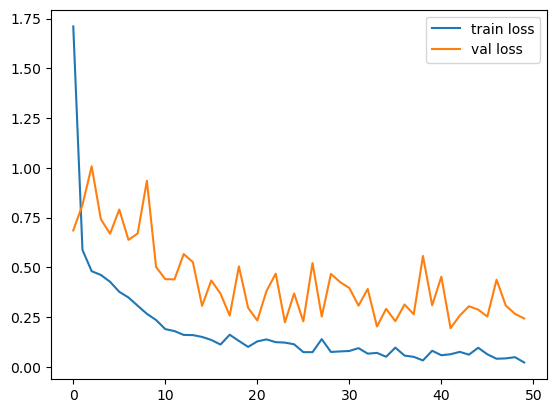

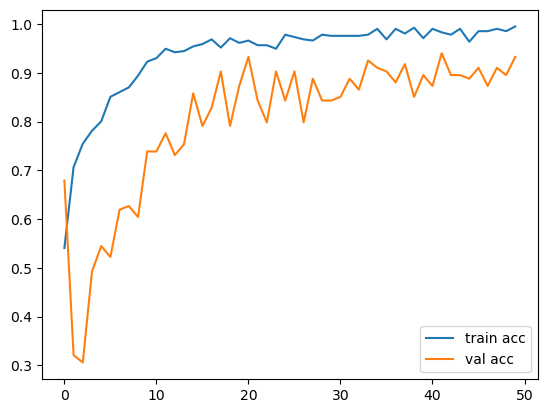

<Figure size 640x480 with 0 Axes>

In [33]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [34]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [35]:
y_pred = model.predict(test_set)

5/5 [==============================] - 1s 91ms/step


In [36]:
y_pred

array([[9.99992013e-01, 7.93692561e-06],
       [9.99997616e-01, 2.34283675e-06],
       [1.00000000e+00, 2.21716654e-08],
       [9.97531652e-01, 2.46833870e-03],
       [9.99998569e-01, 1.41277735e-06],
       [6.80219233e-02, 9.31978106e-01],
       [9.99966145e-01, 3.38439822e-05],
       [1.44085586e-02, 9.85591412e-01],
       [1.00000000e+00, 2.22002194e-09],
       [9.99931812e-01, 6.81527454e-05],
       [9.99996901e-01, 3.04881883e-06],
       [1.00000000e+00, 1.14904364e-10],
       [1.95918512e-02, 9.80408072e-01],
       [1.00000000e+00, 1.47210864e-15],
       [1.01813562e-01, 8.98186445e-01],
       [9.99856353e-01, 1.43577534e-04],
       [9.99996901e-01, 3.05310482e-06],
       [1.53075550e-02, 9.84692454e-01],
       [1.21395634e-02, 9.87860501e-01],
       [4.19730037e-01, 5.80269992e-01],
       [1.00000000e+00, 7.78658214e-12],
       [9.95523214e-01, 4.47681313e-03],
       [9.99700189e-01, 2.99784355e-04],
       [9.99998927e-01, 1.07311530e-06],
       [1.000000

In [37]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [38]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0], dtype=int64)

In [39]:
 
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [40]:
model=load_model('model_vgg19.h5')

In [46]:
img=image.load_img('C:/Users/jagad/OneDrive/Desktop/data/Test/Uninfected/2.png',target_size=(224,224))

In [47]:
x=image.img_to_array(img)
x


array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [48]:
x.shape

(224, 224, 3)

In [49]:
x=x/255

In [50]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [51]:
model.predict(img_data)

1/1 [==============================] - 0s 165ms/step


array([[1., 0.]], dtype=float32)

In [52]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 37ms/step


In [53]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
